In [3]:
# Import required packages
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
#from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

from google.colab import files
uploaded = files.upload()


Saving insurance_clean_vals.csv to insurance_clean_vals (1).csv


In [5]:
data = pd.read_csv('insurance_clean_vals.csv')
data.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,2
1,18,1,33.770,1,0,1
2,28,1,33.000,3,0,1
3,33,1,22.705,0,0,3
4,32,1,28.880,0,0,3


In [6]:
categorical_features = ['sex']
continuous_features = ['age', 'bmi', 'children', 'smoker', 'region']
data[continuous_features].describe()

,age,bmi,children,smoker,region
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,0.204936,1.485415
std,14.044333,6.100468,1.205571,0.403806,1.104552
min,18.000000,15.960000,0.000000,0.000000,0.000000
25%,27.000000,26.290000,0.000000,0.000000,1.000000
50%,39.000000,30.400000,1.000000,0.000000,1.000000
75%,51.000000,34.700000,2.000000,0.000000,2.000000
max,64.000000,53.130000,5.000000,1.000000,3.000000


In [7]:
for col in categorical_features:
  dummies = pd.get_dummies(data[col], prefix=col)
  data = pd.concat([data, dummies], axis=1)
  data.drop(col, axis=1, inplace=True)

data.head()

,age,bmi,children,smoker,region,sex_0,sex_1
0,19,27.900,0,1,2,1,0
1,18,33.770,1,0,1,0,1
2,28,33.000,3,0,1,0,1
3,33,22.705,0,0,3,0,1
4,32,28.880,0,0,3,0,1


In [8]:
mms = MinMaxScaler()
mms.fit(data)
data_transformed = mms.transform(data)

In [9]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

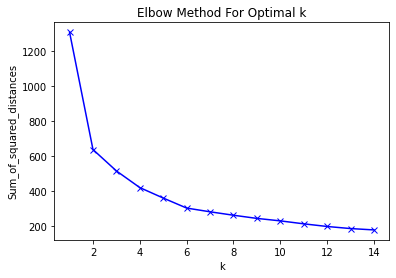

In [10]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()